### 4. Excercise Conditional Agent with two routers

#### Node Factory

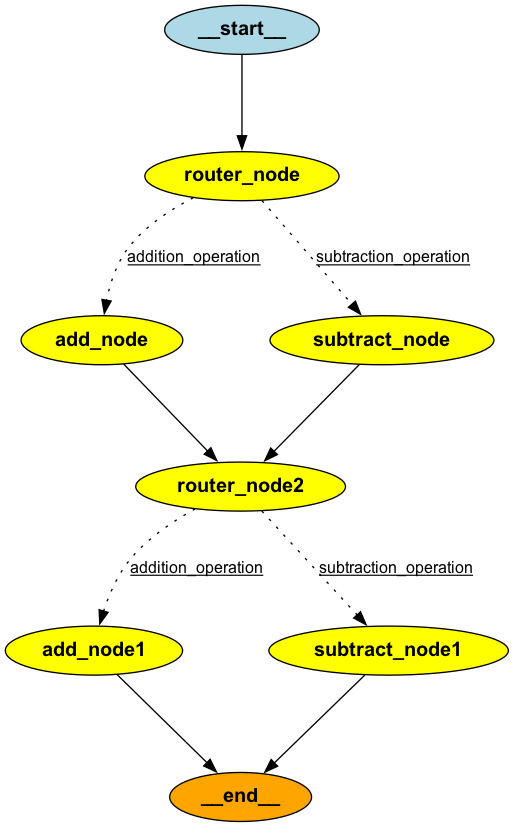

In [9]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display


def create_add_operation_node(num_key1, num_key2, result_key):
    """
    Creates an adder node that adds two numbers from the state.
    :param num_key1: The key for the first number in the state.
    :param num_key2: The key for the second number in the state.
    :param result_key: The key where the result will be stored in the state."""

    def adder(state: AgentState) -> AgentState:
        """This node adds the 2 numbers"""
        state[result_key] = state[num_key1] + state[num_key2]
        return state

    return adder


def create_subtract_operation_node(num_key1, num_key2, result_key):
    """
    Creates a subtractor node that subtracts two numbers from the state.
    :param num_key1: The key for the first number in the state.
    :param num_key2: The key for the second number in the state.
    :param result_key: The key where the result will be stored in the state."""

    def subtractor(state: AgentState) -> AgentState:
        """This node subtracts the 2 numbers"""
        state[result_key] = state[num_key1] - state[num_key2]
        return state

    return subtractor


def create_router_node(operation_key):
    """
    Creates a router node that decides the next operation based on the operation key.
    :param operation_key: The key in the state that determines the operation ("+" or "-").
    """

    def router(state: AgentState) -> AgentState:
        """This node will select the next node of the graph"""

        if state[operation_key] == "+":
            return "addition_operation"

        elif state[operation_key] == "-":
            return "subtraction_operation"

    return router


class AgentState(TypedDict):
    number1: int
    operation: str
    operation2: str
    number2: int
    finalNumber1: int
    number3: int
    number4: int
    finalNumber2: int


graph = StateGraph(AgentState)

graph.add_node(
    node="add_node",
    action=create_add_operation_node("number1", "number2", "finalNumber1"),
)
graph.add_node(
    node="subtract_node",
    action=create_subtract_operation_node("number1", "number2", "finalNumber1"),
)
graph.add_node(
    node="add_node1",
    action=create_add_operation_node("number3", "number4", "finalNumber2"),
)
graph.add_node(
    node="subtract_node1",
    action=create_subtract_operation_node("number3", "number4", "finalNumber2"),
)

graph.add_node("router_node", lambda state: state)
graph.add_node("router_node2", lambda state: state)

PATH_MAP_ROUND1 = {
    "addition_operation": "add_node",
    "subtraction_operation": "subtract_node",
}

PATH_MAP_ROUND2 = {
    "addition_operation": "add_node1",
    "subtraction_operation": "subtract_node1",
}

# Add edges
graph.add_edge(START, "router_node")
graph.add_conditional_edges(
    source="router_node",
    path=create_router_node("operation"),
    path_map=PATH_MAP_ROUND1,
)
graph.add_edge("add_node", "router_node2")
graph.add_edge("subtract_node", "router_node2")

graph.add_conditional_edges(
    source="router_node2",
    path=create_router_node("operation2"),
    path_map=PATH_MAP_ROUND2,
)
graph.add_edge("add_node1", END)
graph.add_edge("subtract_node1", END)

app = graph.compile()

display(Image(app.get_graph().draw_png()))

In [11]:
state = AgentState(
    number1=10,
    operation="+",
    operation2="-",
    number2=5,
    number3=20,
    number4=8,
)
result_state = app.invoke(state)
result_state

{'number1': 10,
 'operation': '+',
 'operation2': '-',
 'number2': 5,
 'finalNumber1': 15,
 'number3': 20,
 'number4': 8,
 'finalNumber2': 12}